In [1]:
import pandas as pd
import os
import glob
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_loc = os.path.join(".","Data")

In [3]:
# Read in one csv file in older format
bike_data_older = pd.read_csv(os.path.join(data_loc,'JC-201509-citibike-tripdata.csv'))
old_colnames = bike_data_older.columns.to_list()
old_colnames

['Trip Duration',
 'Start Time',
 'Stop Time',
 'Start Station ID',
 'Start Station Name',
 'Start Station Latitude',
 'Start Station Longitude',
 'End Station ID',
 'End Station Name',
 'End Station Latitude',
 'End Station Longitude',
 'Bike ID',
 'User Type',
 'Birth Year',
 'Gender']

In [4]:
# Read in one csv file in newer format
bike_data_newer = pd.read_csv(os.path.join(data_loc,'JC-201709-citibike-tripdata.csv'))
new_colnames = bike_data_newer.columns.to_list()
new_colnames

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [5]:
files = [f for f in glob.glob(data_loc + "\*.csv", recursive=True)]
trip_files = []
data_files = []
for f in files:
    if f.find('JC') > -1:
        trip_files.append(f.replace(".\Data\J","J"))
    elif f.find('.\Data\data') > -1:
        data_files.append(f.replace(".\Data\data",'data'))
        
print("Trip Files Identified")
print("---------------------")
print(trip_files)
print(' ')
print("Data Files Identified")
print("---------------------")
print(data_files)

Trip Files Identified
---------------------
['JC-201509-citibike-tripdata.csv', 'JC-201510-citibike-tripdata.csv', 'JC-201511-citibike-tripdata.csv', 'JC-201512-citibike-tripdata.csv', 'JC-201601-citibike-tripdata.csv', 'JC-201602-citibike-tripdata.csv', 'JC-201603-citibike-tripdata.csv', 'JC-201604-citibike-tripdata.csv', 'JC-201605-citibike-tripdata.csv', 'JC-201606-citibike-tripdata.csv', 'JC-201607-citibike-tripdata.csv', 'JC-201608-citibike-tripdata.csv', 'JC-201609-citibike-tripdata.csv', 'JC-201610-citibike-tripdata.csv', 'JC-201611-citibike-tripdata.csv', 'JC-201612-citibike-tripdata.csv', 'JC-201701-citibike-tripdata.csv', 'JC-201702-citibike-tripdata.csv', 'JC-201703-citibike-tripdata.csv', 'JC-201704-citibike-tripdata.csv', 'JC-201705-citibike-tripdata.csv', 'JC-201706-citibike-tripdata.csv', 'JC-201707-citibike-tripdata.csv', 'JC-201708 citibike-tripdata.csv', 'JC-201709-citibike-tripdata.csv', 'JC-201710-citibike-tripdata.csv', 'JC-201711-citibike-tripdata.csv', 'JC-201712

In [6]:
# create a blank dataframe
trip_data = pd.DataFrame()

# Run through the CSV files in the data directory and add them to the dataframe
for f in trip_files:
    
    # read the csv into a dataframe
    trip_data_to_add = pd.read_csv(os.path.join(data_loc,f))
    
    # Create a list of the column names to check against both old and new naming conventions
    col_check = trip_data_to_add.columns.to_list()
    
    # If this is the new naming convention then reset the column names to the old version
    if col_check == new_colnames:
        trip_data_to_add.set_axis(old_colnames,axis=1,inplace=True)
        
    # if this is not the old or the new names then put that in the output for further investigation
    elif col_check != old_colnames:
        print(f"Check column names for {f2read}-- Not the same as old or new")
        print(col_check)
        
    # Now that we standardized column names, concatonate the data
    trip_data = pd.concat([trip_data,trip_data_to_add])
    
# Create some extra variables so we can search for outliers and erroenous data

# Create trip duration in hours and days
trip_data['Trip Duration Hours'] = trip_data['Trip Duration'] / 3600
trip_data['Trip Duration Days'] = trip_data['Trip Duration Hours'] / 24

# Create flags for female and 
trip_data['Male'] = (trip_data['Gender'] == 1).astype(int)
trip_data['Female'] = (trip_data['Gender'] == 2).astype(int)

trip_data['Male Indicator'] = (trip_data['Gender'] == 1).astype(int)
trip_data['Female Indicator'] = (trip_data['Gender'] == 2).astype(int)


In [7]:
column_check = trip_data.columns.to_list()
column_check

['Trip Duration',
 'Start Time',
 'Stop Time',
 'Start Station ID',
 'Start Station Name',
 'Start Station Latitude',
 'Start Station Longitude',
 'End Station ID',
 'End Station Name',
 'End Station Latitude',
 'End Station Longitude',
 'Bike ID',
 'User Type',
 'Birth Year',
 'Gender',
 'Trip Duration Hours',
 'Trip Duration Days',
 'Male',
 'Female',
 'Male Indicator',
 'Female Indicator']

In [8]:
trip_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,Bike ID,User Type,Birth Year,Gender,Trip Duration Hours,Trip Duration Days,Male,Female,Male Indicator,Female Indicator
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717733,-74.043845,3185,City Hall,40.717733,...,24722,Subscriber,1975.0,1,0.016944,0.000706,1,0,1,0
1,290,2015-09-21 14:55:59,2015-09-21 15:00:50,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,...,24388,Customer,NaN,0,0.080556,0.003356,0,0,0,0
2,786,2015-09-21 14:56:14,2015-09-21 15:09:21,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,...,24442,Subscriber,1962.0,1,0.218333,0.009097,1,0,1,0
3,477,2015-09-21 14:58:35,2015-09-21 15:06:32,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,...,24678,Subscriber,1977.0,2,0.132500,0.005521,0,1,0,1
4,451,2015-09-21 14:59:55,2015-09-21 15:07:27,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,...,24574,Subscriber,1977.0,2,0.125278,0.005220,0,1,0,1


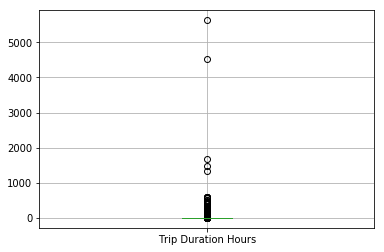

In [9]:
boxplot = trip_data.boxplot(column=['Trip Duration Hours'])

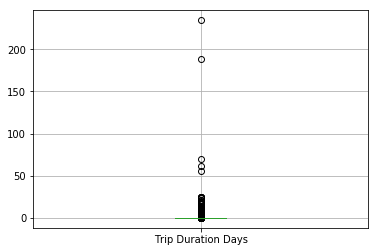

In [10]:
boxplot2 = trip_data.boxplot(column=['Trip Duration Days'])
plt.savefig("Images/Duration_Boxplot_Before_Cleaning.png")

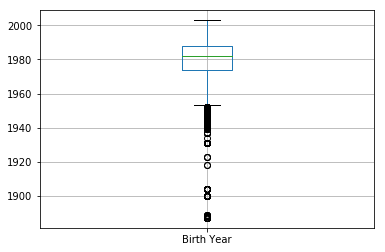

In [11]:
boxplot3 = trip_data.boxplot(column=['Birth Year'])
plt.savefig("Images/BirthYear_Boxplot_Before_Cleaning.png")

In [12]:
trip_data_size_b4 = len(trip_data)

# drop lattitude and longitude values that are not within 150 miles of new york city
trip_data = trip_data[trip_data['Start Station Latitude'] > 38]
trip_data = trip_data[trip_data['Start Station Latitude'] < 42]
trip_data = trip_data[trip_data['End Station Latitude'] > 38]
trip_data = trip_data[trip_data['End Station Latitude'] < 42]
trip_data = trip_data[trip_data['Start Station Longitude'] > -76]
trip_data = trip_data[trip_data['Start Station Longitude'] < -72]
trip_data = trip_data[trip_data['End Station Longitude'] > -76]
trip_data = trip_data[trip_data['End Station Longitude'] < -72]

# Drop ages that are greater than 90. These are either erroneous, fake, or outlier riders
trip_data = trip_data[trip_data['Birth Year'] >= 1929]

# Drop trips that lasted more than 50 days
trip_data = trip_data[trip_data['Trip Duration Days'] < 7]

# Drop records with missing information
trip_data = trip_data.dropna()

# recalculate length
trip_data_size_after = len(trip_data)
num_deleted = trip_data_size_b4 - trip_data_size_after

print(f"Trip data size before cleaning: {trip_data_size_b4}")
print(f"Trip data size after cleaning: {trip_data_size_after}")
print(f"Number of records deleted: {num_deleted}")

Trip data size before cleaning: 1163501
Trip data size after cleaning: 1117749
Number of records deleted: 45752


In [13]:
trip_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,Bike ID,User Type,Birth Year,Gender,Trip Duration Hours,Trip Duration Days,Male,Female,Male Indicator,Female Indicator
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717733,-74.043845,3185,City Hall,40.717733,...,24722,Subscriber,1975.0,1,0.016944,0.000706,1,0,1,0
2,786,2015-09-21 14:56:14,2015-09-21 15:09:21,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,...,24442,Subscriber,1962.0,1,0.218333,0.009097,1,0,1,0
3,477,2015-09-21 14:58:35,2015-09-21 15:06:32,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,...,24678,Subscriber,1977.0,2,0.132500,0.005521,0,1,0,1
4,451,2015-09-21 14:59:55,2015-09-21 15:07:27,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,...,24574,Subscriber,1977.0,2,0.125278,0.005220,0,1,0,1
5,401,2015-09-21 15:06:03,2015-09-21 15:12:44,3195,Sip Ave,40.730743,-74.063784,3195,Sip Ave,40.730743,...,24520,Subscriber,1987.0,2,0.111389,0.004641,0,1,0,1


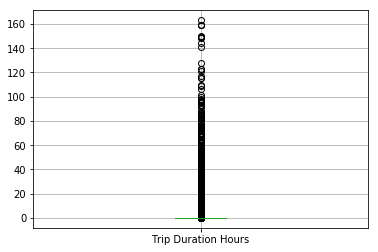

In [14]:
boxplota = trip_data.boxplot(column=['Trip Duration Hours'])
plt.savefig("Images/Duration_Boxplot_After_Cleaning.png")

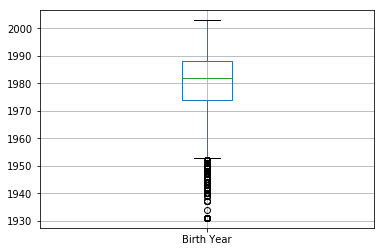

In [15]:
boxplot3a = trip_data.boxplot(column=['Birth Year'])
plt.savefig("Images/BirthYear_Boxplot_After_Cleaning.png")

In [16]:
trip_data.to_csv(os.path.join(data_loc,'Combined_Bike_Data.csv'), index=False)

In [17]:
#trip_data_sample = trip_data.sample(frac=0.1, replace=False)
#trip_data_sample.to_csv(os.path.join(data_loc,'Combined_Bike_Data_Sample.csv'), index=False)

In [18]:
# Read in one csv file and find column names
data_file_test = pd.read_csv(os.path.join(data_loc,'data-0FwJZ.csv'))
data_file_colnames = data_file_test.columns.to_list()
data_file_colnames

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Members',
 'Annual Member Sign-Ups (midnight to 11:59 pm)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)\t7-Day Passes Purchased (midnight to 11:59 pm)']

In [19]:
# Read in one csv file and find column names
data_file_test2 = pd.read_csv(os.path.join(data_loc,'data-jMx9R.csv'))
data_file_colnames2 = data_file_test2.columns.to_list()
data_file_colnames2

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '7-Day Passes Purchased (midnight to 11:59 pm)']

In [20]:
# Read in one csv file and find column names
data_file_test3 = pd.read_csv(os.path.join(data_loc,'data-0Si1U.csv'))
data_file_colnames3 = data_file_test3.columns.to_list()
data_file_colnames3

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Memberships Sold',
 'Annual Member Sign-Ups (midnight to 11:59 pm)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '7-Day Passes Purchased (midnight to 11:59 pm)']

In [21]:
# Read in one csv file and find column names
data_file_test4 = pd.read_csv(os.path.join(data_loc,'data-33zqP.csv'))
data_file_colnames4 = data_file_test4.columns.to_list()
data_file_colnames4

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Miles traveled today (midnight to 11:59 pm)',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '3-Day Passes Purchased (midnight to 11:59 pm)']

In [22]:
# Read in one csv file and find column names
data_file_test5 = pd.read_csv(os.path.join(data_loc,'data-8eZnB.csv'))
data_file_colnames5 = data_file_test5.columns.to_list()
data_file_colnames5

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '3-Day Passes Purchased (midnight to 11:59 pm)',
 '7-Day Passes Purchased (midnight to 11:59 pm)']

In [23]:
# Read in one csv file and find column names
data_file_test6 = pd.read_csv(os.path.join(data_loc,'data-gRmSF.csv'))
data_file_colnames6 = data_file_test6.columns.to_list()
data_file_colnames6

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '3-Day Passes Purchased (midnight to 11:59 pm)']

In [24]:
# Read in one csv file and find column names
data_file_test7 = pd.read_csv(os.path.join(data_loc,'data-MM5kM.csv'))
data_file_colnames7 = data_file_test7.columns.to_list()
data_file_colnames7

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Miles traveled today (midnight to 11:59 pm)',
 'Total Annual Members (All Time)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '3-Day Passes Purchased (midnight to 11:59 pm)',
 'Column 1']

In [25]:
# Read in one csv file and find column names
data_file_test8 = pd.read_csv(os.path.join(data_loc,'data-pe6k4.csv'))
data_file_colnames8 = data_file_test8.columns.to_list()
data_file_colnames8

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch):',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date:',
 'Total Annual Members',
 'Annual Member Sign-Ups (midnight to 11:59 pm)',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '7-Day Passes Purchased (midnight to 11:59 pm)']

In [26]:
# Read in one csv file and find column names
data_file_test10 = pd.read_csv(os.path.join(data_loc,'data-xEsQz.csv'))
data_file_colnames10 = data_file_test10.columns.to_list()
data_file_colnames10

['Date',
 'Trips over the past 24-hours (midnight to 11:59pm)',
 'Cumulative trips (since launch)',
 'Miles traveled today (midnight to 11:59 pm)',
 'Miles traveled to date',
 'Total Annual Memberships Sold',
 '24-Hour Passes Purchased (midnight to 11:59 pm)',
 '7-Day Passes Purchased (midnight to 11:59 pm)']

In [27]:
# Create a list of the columns we eventually want
daily_cols = ['Date','Daily Number of Trips','Daily Miles Traveled','Cumulative Annual Members']

# create a blank dataframe
daily_data = pd.DataFrame()

# Run through the CSV files in the data directory and add them to the dataframe
for f in data_files:
    
    # read the csv into a dataframe
    daily_data_to_add = pd.read_csv(os.path.join(data_loc,f))
    
    # Create a list of the column names to check against both old and new naming conventions
    col_check = daily_data_to_add.columns.to_list()
    
    for col in col_check:
        if col == 'Trips over the past 24-hours (midnight to 11:59pm)':
            daily_data_to_add.rename(columns={'Trips over the past 24-hours (midnight to 11:59pm)': 'Daily Number of Trips'}, inplace = True)

        if col == 'Miles traveled today (midnight to 11:59 pm)':
            daily_data_to_add.rename(columns={'Miles traveled today (midnight to 11:59 pm)': 'Daily Miles Traveled'}, inplace = True)

        if col == 'Total Annual Members':
            daily_data_to_add.rename(columns={'Total Annual Members': 'Cumulative Annual Members'}, inplace = True)

        if col == 'Total Annual Members (All Time)':
            daily_data_to_add.rename(columns={'Total Annual Members (All Time)': 'Cumulative Annual Members'}, inplace = True)

        if col == 'Total Annual Memberships Sold':
            daily_data_to_add.rename(columns={'Total Annual Memberships Sold': 'Cumulative Annual Members'}, inplace = True)

     
            
    daily_data_to_add = daily_data_to_add[['Date','Daily Number of Trips','Daily Miles Traveled','Cumulative Annual Members']]
        
    # Now that we standardized column names, concatonate the data
    daily_data = pd.concat([daily_data,daily_data_to_add])
    
daily_data.head()

,Date,Daily Number of Trips,Daily Miles Traveled,Cumulative Annual Members
0,10/1/2013,44772,73.665,85494
1,10/2/2013,45667,76.149,85773
2,10/3/2013,44472,72.635,86333
3,10/4/2013,44089,74.223,87112
4,10/5/2013,37683,73.892,87862


In [28]:
daily_data.describe()

,Daily Number of Trips,Daily Miles Traveled,Cumulative Annual Members
count,2206.000000,2206.000000,2.206000e+03
mean,36690.606981,63775.836495,8.520182e+05
std,18322.832353,50325.556604,3.133646e+07
min,0.000000,0.000000,1.721600e+04
25%,23401.000000,16176.000000,1.269272e+05
50%,35759.000000,60959.000000,1.747150e+05
75%,49306.000000,104028.250000,2.527518e+05
max,83347.000000,189852.000000,1.471994e+09


In [29]:
daily_data.to_csv(os.path.join(data_loc,'daily_data_combined.csv'),index=False)